### Preparing data

#### Preparing images

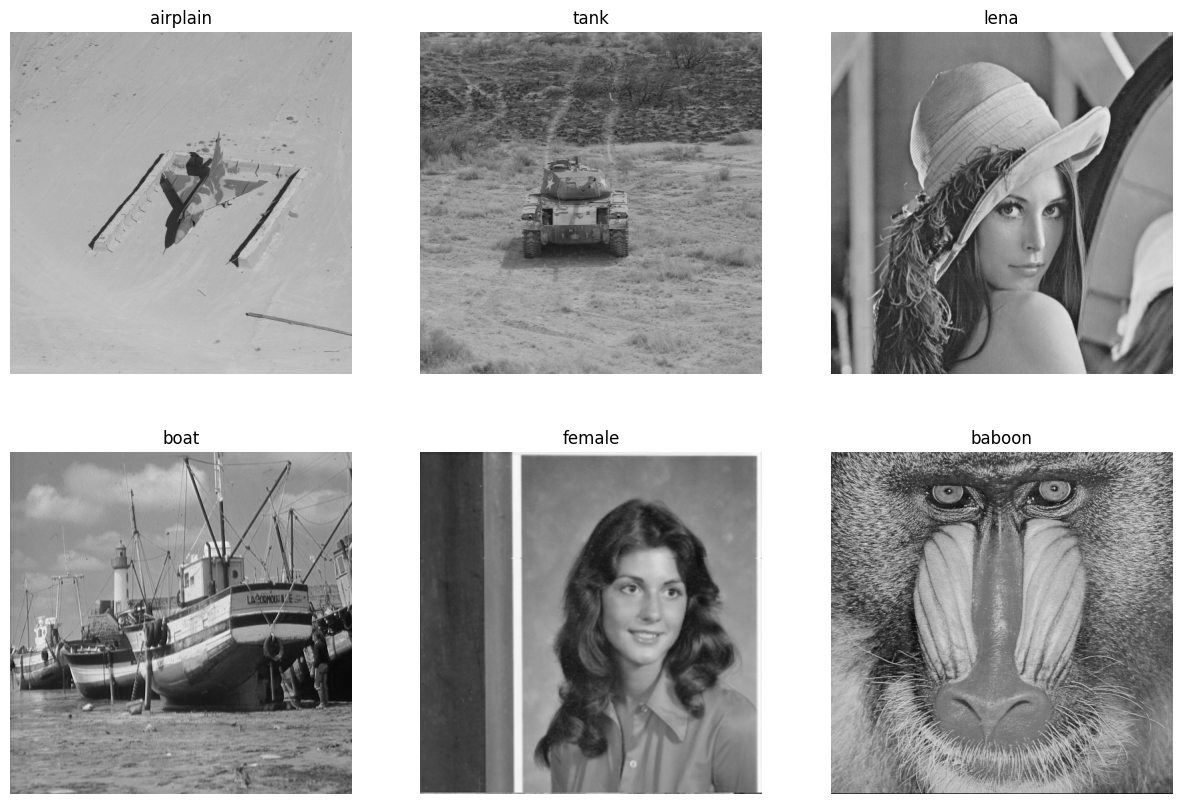

In [1]:
import utils
import os

imgs_folder = "./inputs/imgs/control"

default_side_size = 512
imgs_names = [f for f in os.listdir(imgs_folder) if f.endswith('.png')]
imgs = [(utils.load_image(imgs_folder + "/" + f, default_side_size), f.split(".")[0]) for f in imgs_names]
imgs_count = len(imgs)
utils.show_images(*imgs)

#### Preparing message and constants

In [2]:
import utils
import ABC

reaply_iterations = 10
block_size = 16
abc_space = ABC.AbcSpace(t=(1, 10), block_size=block_size)

watermark = utils.get_message(version=1, length=(default_side_size // block_size) ** 2)
print(f"Watermark length: {len(watermark)}")

Watermark length: 1024


#### test process

In [3]:
%%script true

import embedding
import importlib
importlib.reload(embedding)

process_params = embedding.ProcessParams()
process_params.debug                  = 0
process_params.show                   = 1
process_params.use_new_error_function = 0
process_params.use_new_bit_extraction = 0
process_params.use_new_side_info      = 0
process_params.compress_side_info     = 0

img = imgs[0][0]

stat = embedding.process(img, watermark, 1, block_size, process_params)
print(stat)

#### original embedding

In [49]:
import statistic
import embedding
import utils

stats_name = 'original_only_embedding.json'

stats = {}
process_params = embedding.ProcessParams()

utils.progress(0, imgs_count)
finished_iteration = 0

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    stat = embedding.process(img[0], watermark, 1, block_size, process_params)
    stats[img[1]]["raw"].append(stat._to_dict())

    finished_iteration += 1
    utils.progress(finished_iteration, imgs_count)

statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### original abc

In [5]:
import statistic
import ABC
import utils

stats_name = 'original_abc.json'

stats = {}
abc_params = ABC.AbcParams()

total_iterations = imgs_count * reaply_iterations
finished_iteration = 0
utils.progress(0, total_iterations)

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    for iteration in range(reaply_iterations):
        abc = ABC.Abc(img[0], watermark, abc_space, abc_params)
        _, stat = abc.run()
        stats[img[1]]["raw"].append(stat._to_dict())
        
        finished_iteration += 1
        utils.progress(finished_iteration, total_iterations)

statistic.aggregate_stats(stats)
statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### random sol

In [6]:
import statistic
import ABC
import utils

stats_name = 'original_random.json'

stats = {}
abc_params = ABC.AbcParams()

total_iterations = imgs_count * reaply_iterations
finished_iteration = 0
utils.progress(0, total_iterations)

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    for iteration in range(reaply_iterations):
        abc = ABC.Abc(img[0], watermark, abc_space, abc_params)
        _, stat = abc.run_random()
        stats[img[1]]["raw"].append(stat._to_dict())
        
        finished_iteration += 1
        utils.progress(finished_iteration, total_iterations)

statistic.aggregate_stats(stats)
statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### different embedding strength

In [7]:
import statistic
import embedding
import utils

stats_name = 'different_embedding_strength.json'

stats = {}
process_params = embedding.ProcessParams()

total_iterations = imgs_count * 10
finished_iteration = 0
utils.progress(0, total_iterations)

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    for t in range(1, 11):
        stat = embedding.process(img[0], watermark, t, block_size, process_params)
        stats[img[1]]["raw"].append(stat._to_dict())

        finished_iteration += 1
        utils.progress(finished_iteration, total_iterations)

statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### different block size

In [8]:
import statistic
import embedding
import utils

stats_name = 'different_block_size.json'

stats = {}
process_params = embedding.ProcessParams()

total_iterations = imgs_count * 8
finished_iteration = 0
utils.progress(0, total_iterations)

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    for power in range(2, 10):
        stat = embedding.process(img[0], watermark, 1, 2 ** power, process_params)
        stats[img[1]]["raw"].append(stat._to_dict())

        finished_iteration += 1
        utils.progress(finished_iteration, total_iterations)

statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### new error function

In [9]:
import statistic
import ABC
import utils

stats_name = 'new_error_function.json'

stats = {}
abc_params = ABC.AbcParams()
abc_params.use_new_error_function = True

total_iterations = imgs_count * reaply_iterations
finished_iteration = 0
utils.progress(0, total_iterations)

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    for iteration in range(reaply_iterations):
        abc = ABC.Abc(img[0], watermark, abc_space, abc_params)
        _, stat = abc.run()
        stats[img[1]]["raw"].append(stat._to_dict())
        
        finished_iteration += 1
        utils.progress(finished_iteration, total_iterations)

statistic.aggregate_stats(stats)
statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### new side info

In [50]:
import statistic
import embedding
import utils

stats_name = 'new_side_info.json'

stats = {}
process_params = embedding.ProcessParams()
process_params.use_new_side_info = True

utils.progress(0, imgs_count)
finished_iteration = 0

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    stat = embedding.process(img[0], watermark, 1, block_size, process_params)
    stats[img[1]]["raw"].append(stat._to_dict())

    finished_iteration += 1
    utils.progress(finished_iteration, imgs_count)

statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### compressing new side info

In [3]:
import statistic
import embedding
import utils

stats_name = 'new_side_info_compressed.json'

stats = {}
process_params = embedding.ProcessParams()
process_params.use_new_side_info = True
process_params.compress_side_info = True

utils.progress(0, imgs_count)
finished_iteration = 0

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    stat = embedding.process(img[0], watermark, 1, block_size, process_params)
    stats[img[1]]["raw"].append(stat._to_dict())

    finished_iteration += 1
    utils.progress(finished_iteration, imgs_count)

statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### new error function with new side info compressed

In [12]:
import statistic
import ABC
import utils

stats_name = 'new_error_function_with_side_info_compressed.json'

stats = {}
abc_params = ABC.AbcParams()
abc_params.use_new_error_function = True
abc_params.process_params.use_new_side_info = True
abc_params.process_params.compress_side_info = True

total_iterations = imgs_count * reaply_iterations
finished_iteration = 0
utils.progress(0, total_iterations)

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    for iteration in range(reaply_iterations):
        abc = ABC.Abc(img[0], watermark, abc_space, abc_params)
        _, stat = abc.run()
        stats[img[1]]["raw"].append(stat._to_dict())
        
        finished_iteration += 1
        utils.progress(finished_iteration, total_iterations)

statistic.aggregate_stats(stats)
statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### new modification factor

In [13]:
import statistic
import ABC
import utils

stats_name = 'new_modification_factor.json'

stats = {}
abc_params = ABC.AbcParams()
abc_params.use_new_mf = True

total_iterations = imgs_count * reaply_iterations
finished_iteration = 0
utils.progress(0, total_iterations)

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    for iteration in range(reaply_iterations):
        abc = ABC.Abc(img[0], watermark, abc_space, abc_params)
        _, stat = abc.run()
        stats[img[1]]["raw"].append(stat._to_dict())
        
        finished_iteration += 1
        utils.progress(finished_iteration, total_iterations)

statistic.aggregate_stats(stats)
statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


#### all modifications

In [14]:
import statistic
import ABC
import utils

stats_name = 'all_modifications.json'

stats = {}
abc_params = ABC.AbcParams()
abc_params.use_new_mf = True
abc_params.process_params.use_new_error_function = True
abc_params.process_params.use_new_bit_extraction = True
abc_params.process_params.use_new_side_info = True
abc_params.process_params.compress_side_info = True

total_iterations = imgs_count * reaply_iterations
finished_iteration = 0
utils.progress(0, total_iterations)

for img in imgs:
    stats[img[1]] = {"raw": [], "avr": {}}
    for iteration in range(reaply_iterations):
        abc = ABC.Abc(img[0], watermark, abc_space, abc_params)
        _, stat = abc.run()
        stats[img[1]]["raw"].append(stat._to_dict())
        
        finished_iteration += 1
        utils.progress(finished_iteration, total_iterations)

statistic.aggregate_stats(stats)
statistic.save_stats(stats, stats_name)

Progress: |██████████████████████████████████████████████████| 100.0% Complete


### Charts

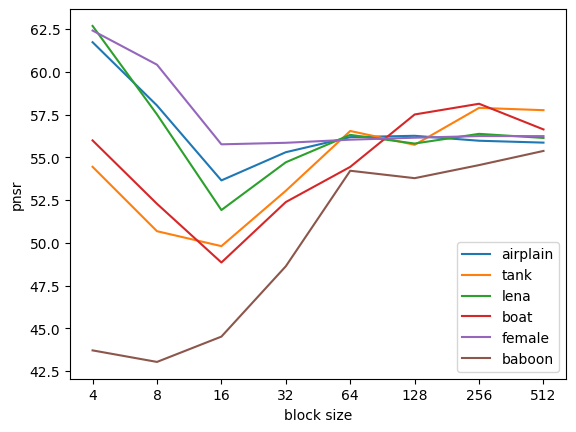

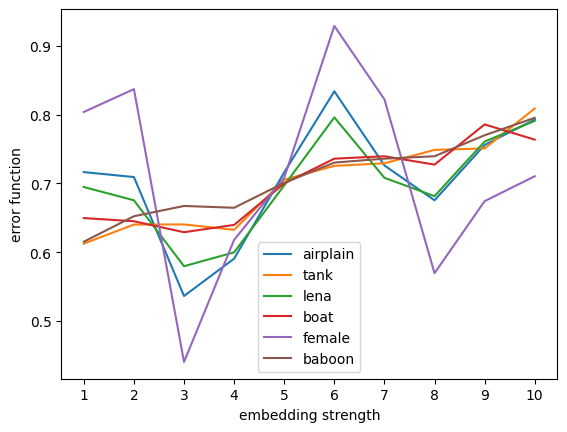

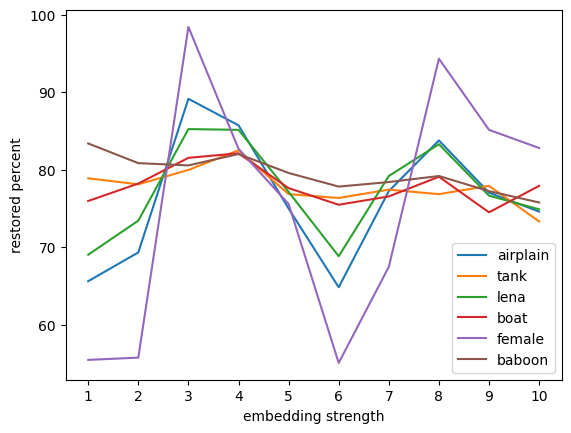

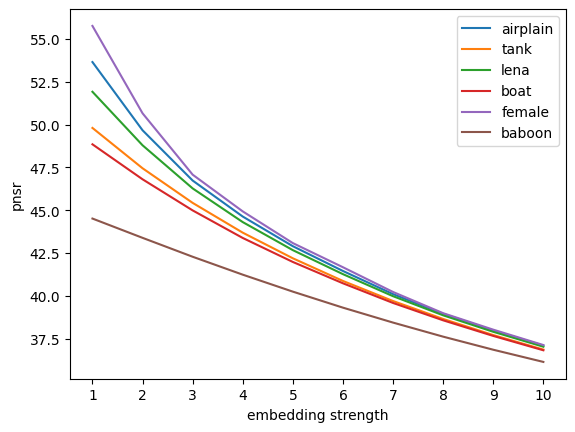

In [5]:
import statistic
import matplotlib.pyplot as plt

diff_embedding_strength = statistic.read_stats('different_embedding_strength.json')
diff_block_size = statistic.read_stats('different_block_size.json')

def get_stats(stats, x_name, y_name):
    values = {}
    for img in stats:
        x = [raw[x_name] for raw in stats[img]['raw']]
        y = [raw[y_name] for raw in stats[img]['raw']]
        values[img] = (x, y)
    return values

def gen_graph(stats, x_name, y_name):
    for img in stats:
        x, y = stats[img]
        plt.plot(range(len(x)), y, label=img)
    plt.xticks(range(len(x)), x)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.legend()
    plt.show()

res_block_size_pnsr = get_stats(diff_block_size, 'block_size', 'pnsr')
res_embedding_strength_error = get_stats(diff_embedding_strength, 't', 'error_function')
res_embedding_strength_restored_percent = get_stats(diff_embedding_strength, 't', 'restored_percent')
res_embedding_strength_pnsr = get_stats(diff_embedding_strength, 't', 'pnsr')

gen_graph(res_block_size_pnsr, 'block size', 'pnsr')
gen_graph(res_embedding_strength_error, 'embedding strength', 'error function')
gen_graph(res_embedding_strength_restored_percent, 'embedding strength', 'restored percent')
gen_graph(res_embedding_strength_pnsr, 'embedding strength', 'pnsr')

In [6]:
import statistic
import numpy as np
import matplotlib.pyplot as plt

def get_stats(stats_old, stats_new, var_name):
    objects = list(stats_old.keys()) 
    data1, data2 = [], []
    for obj in objects:
        data1.append((
            stats_old[obj]['avr'][f'min_{var_name}'],
            stats_old[obj]['avr'][f'avr_{var_name}'],
            stats_old[obj]['avr'][f'max_{var_name}']
        ))
        data2.append((
            stats_new[obj]['avr'][f'min_{var_name}'],
            stats_new[obj]['avr'][f'avr_{var_name}'],
            stats_new[obj]['avr'][f'max_{var_name}']
        ))
    return objects, data1, data2

def plot_comparison(labels, data_v1, v1_name, data_v2, v2_name, y_label):
    x_positions = np.arange(len(labels))
    offset = 0.1
    
    plt.figure(figsize=(6, 3))
    
    for i, (min_val, mean_val, max_val) in enumerate(data_v1):
        x_pos = x_positions[i] - offset
        plt.vlines(x=x_pos, ymin=min_val, ymax=max_val, color='blue', alpha=0.5)
        plt.plot(x_pos, min_val, 'bo', markersize=8)
        plt.plot(x_pos, mean_val, 'bo', markersize=8)
        plt.plot(x_pos, max_val, 'bo', markersize=8)
    
    for i, (min_val, mean_val, max_val) in enumerate(data_v2):
        x_pos = x_positions[i] + offset
        plt.vlines(x=x_pos, ymin=min_val, ymax=max_val, color='red', alpha=0.5)
        plt.plot(x_pos, min_val, 'ro', markersize=8)
        plt.plot(x_pos, mean_val, 'ro', markersize=8)
        plt.plot(x_pos, max_val, 'ro', markersize=8)
    
    plt.xticks(x_positions, labels)
    plt.xlabel('Images')
    plt.ylabel(y_label)
    
    plt.plot([], [], 'bo-', label=v1_name, alpha=0.5)
    plt.plot([], [], 'ro-', label=v2_name, alpha=0.5)
    plt.legend()
    
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

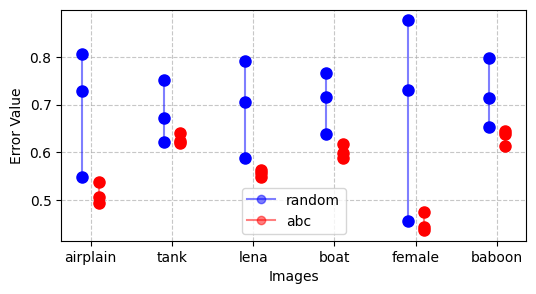

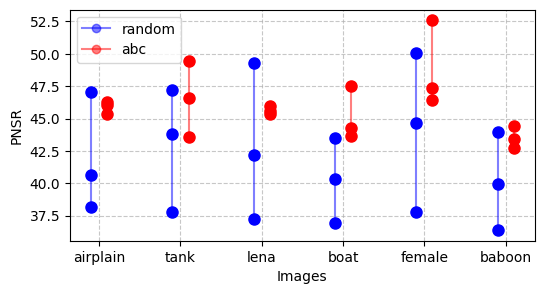

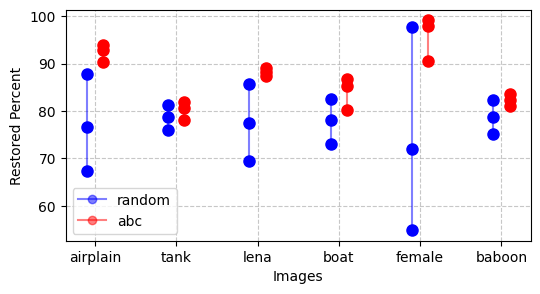

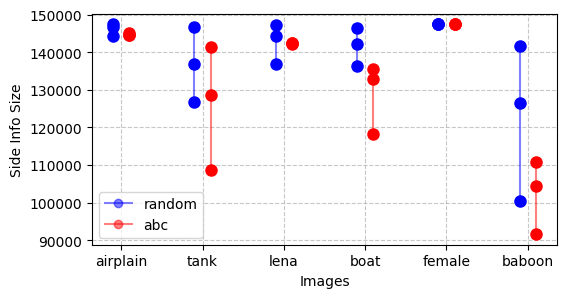

In [7]:
import statistic
import numpy as np
import matplotlib.pyplot as plt

stats_old = statistic.read_stats('original_abc.json')
stats_new = statistic.read_stats('original_random.json')

old_name = "random"
new_name = "abc"

error_objects, error_data1, error_data2 = get_stats(stats_new, stats_old, 'error_function')
plot_comparison(error_objects, error_data1, old_name, error_data2, new_name, "Error Value")

pnsr_objects, pnsr_data1, pnsr_data2 = get_stats(stats_new, stats_old, 'pnsr')
plot_comparison(pnsr_objects, pnsr_data1, old_name, pnsr_data2, new_name, "PNSR")

restored_objects, restored_data1, restored_data2 = get_stats(stats_new, stats_old, 'restored_percent')
plot_comparison(restored_objects, restored_data1, old_name, restored_data2, new_name, "Restored Percent")

size_objects, size_data1, size_data2 = get_stats(stats_new, stats_old, 'side_info_size')
plot_comparison(size_objects, size_data1, old_name, size_data2, new_name, "Side Info Size")

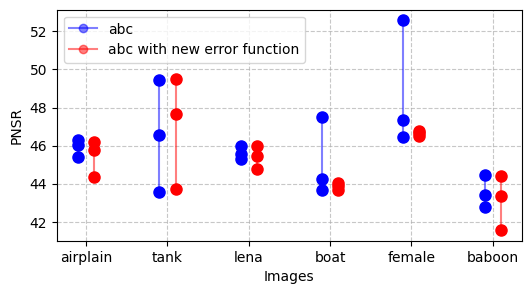

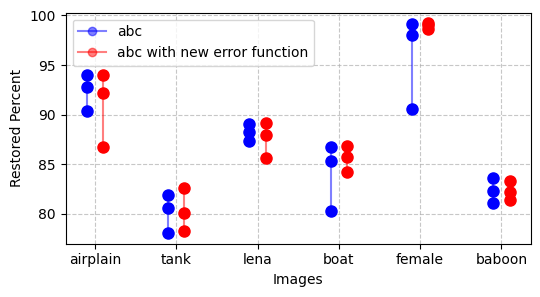

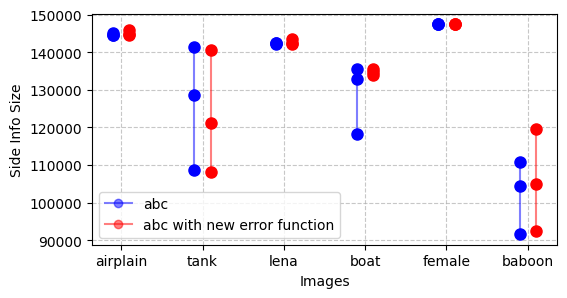

In [8]:
import statistic
import numpy as np
import matplotlib.pyplot as plt

stats_old = statistic.read_stats('original_abc.json')
stats_new = statistic.read_stats('new_error_function.json')

old_name = "abc"
new_name = "abc with new error function"

pnsr_objects, pnsr_data1, pnsr_data2 = get_stats(stats_old, stats_new, 'pnsr')
plot_comparison(pnsr_objects, pnsr_data1, old_name, pnsr_data2, new_name, "PNSR")

restored_objects, restored_data1, restored_data2 = get_stats(stats_old, stats_new, 'restored_percent')
plot_comparison(restored_objects, restored_data1, old_name, restored_data2, new_name, "Restored Percent")

size_objects, size_data1, size_data2 = get_stats(stats_old, stats_new, 'side_info_size')
plot_comparison(size_objects, size_data1, old_name, size_data2, new_name, "Side Info Size")

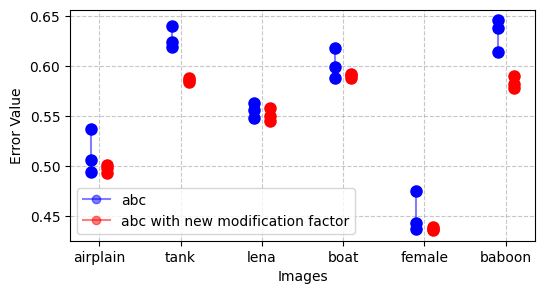

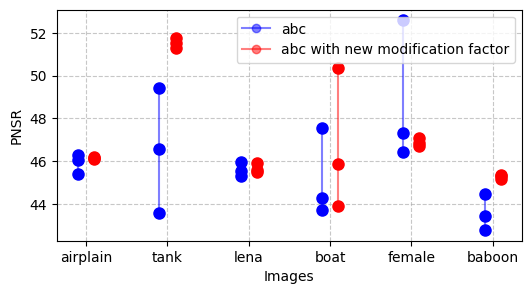

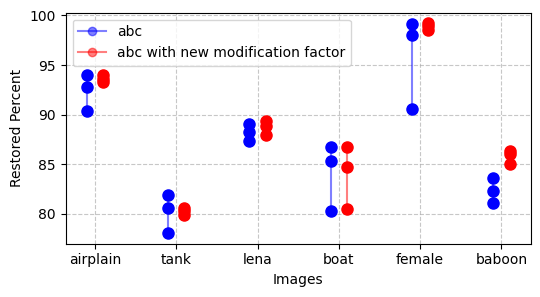

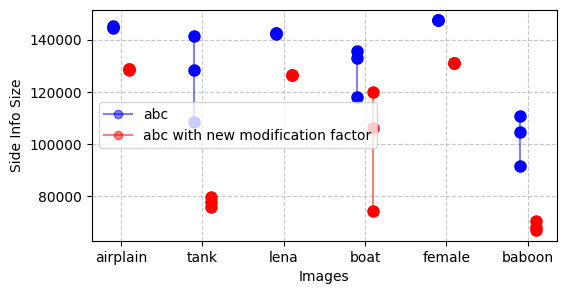

In [9]:
import statistic
import numpy as np
import matplotlib.pyplot as plt

stats_old = statistic.read_stats('original_abc.json')
stats_new = statistic.read_stats('new_modification_factor.json')

old_name = "abc"
new_name = "abc with new modification factor"

error_objects, error_data1, error_data2 = get_stats(stats_old, stats_new, 'error_function')
plot_comparison(error_objects, error_data1, old_name, error_data2, new_name, "Error Value")

pnsr_objects, pnsr_data1, pnsr_data2 = get_stats(stats_old, stats_new, 'pnsr')
plot_comparison(pnsr_objects, pnsr_data1, old_name, pnsr_data2, new_name, "PNSR")

restored_objects, restored_data1, restored_data2 = get_stats(stats_old, stats_new, 'restored_percent')
plot_comparison(restored_objects, restored_data1, old_name, restored_data2, new_name, "Restored Percent")

size_objects, size_data1, size_data2 = get_stats(stats_old, stats_new, 'side_info_size')
plot_comparison(size_objects, size_data1, old_name, size_data2, new_name, "Side Info Size")

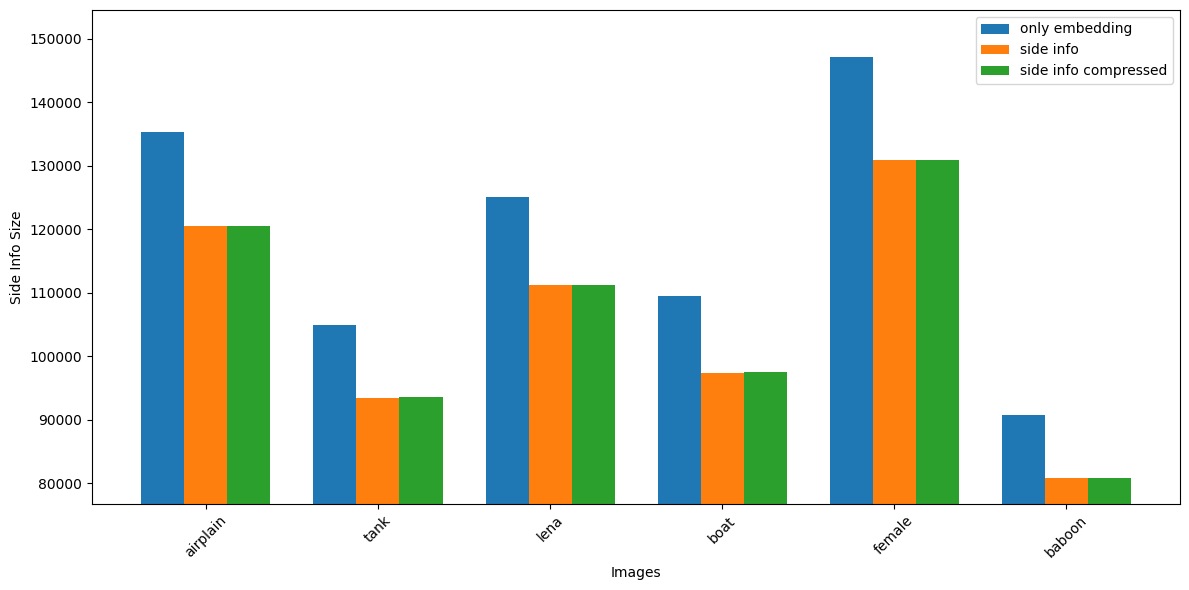

In [10]:
import statistic
import numpy as np
import matplotlib.pyplot as plt

def get_stats_info(stats):
    values = []
    for img in stats:
        values.append(stats[img]['raw'][0]['side_info_size'])
    return values

def show_plot(keys, values_old, values_new1, values_new2, old_name, new_name1, new_name2):
    bar_width = 0.25
    x = np.arange(len(keys))

    plt.figure(figsize=(12, 6))

    plt.bar(x - bar_width, values_old, bar_width, label=old_name)
    plt.bar(x, values_new1, bar_width, label=new_name1)
    plt.bar(x + bar_width, values_new2, bar_width, label=new_name2)

    min_value = min(min(values_old), min(values_new1), min(values_new2))
    plt.ylim(bottom=min_value * 0.95)

    plt.xlabel('Images')
    plt.ylabel('Side Info Size')
    plt.xticks(x, keys, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

stats_old = statistic.read_stats('original_only_embedding.json')
stats_new1 = statistic.read_stats('new_side_info.json')
stats_new2 = statistic.read_stats('new_side_info_compressed.json')

keys = list(stats_old.keys())
values_old = get_stats_info(stats_old)
values_new1 = get_stats_info(stats_new1)
values_new2 = get_stats_info(stats_new2)

old_name = "only embedding"
new_name1 = "side info"
new_name2 = "side info compressed"

show_plot(keys, values_old, values_new1, values_new2, old_name, new_name1, new_name2)

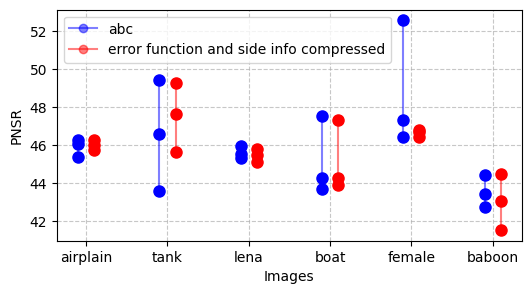

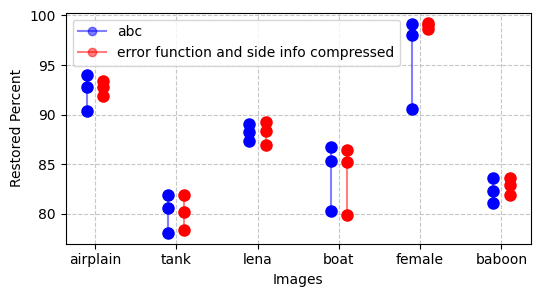

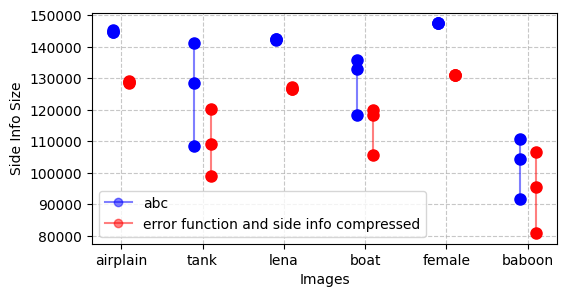

In [11]:
import statistic
import numpy as np
import matplotlib.pyplot as plt

stats_old = statistic.read_stats('original_abc.json')
stats_new = statistic.read_stats('new_error_function_with_side_info_compressed.json')

old_name = "abc"
new_name = "error function and side info compressed"

pnsr_objects, pnsr_data1, pnsr_data2 = get_stats(stats_old, stats_new, 'pnsr')
plot_comparison(pnsr_objects, pnsr_data1, old_name, pnsr_data2, new_name, "PNSR")

restored_objects, restored_data1, restored_data2 = get_stats(stats_old, stats_new, 'restored_percent')
plot_comparison(restored_objects, restored_data1, old_name, restored_data2, new_name, "Restored Percent")

size_objects, size_data1, size_data2 = get_stats(stats_old, stats_new, 'side_info_size')
plot_comparison(size_objects, size_data1, old_name, size_data2, new_name, "Side Info Size")

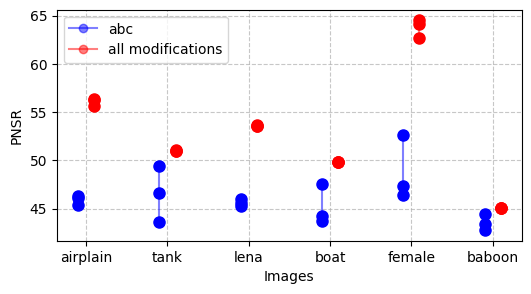

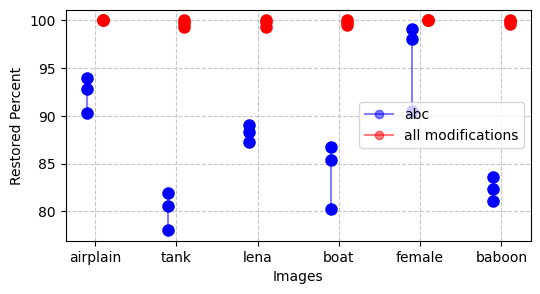

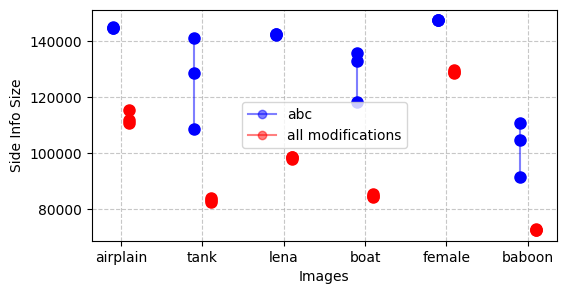

In [12]:
import statistic
import numpy as np
import matplotlib.pyplot as plt

stats_old = statistic.read_stats('original_abc.json')
stats_new = statistic.read_stats('all_modifications.json')

old_name = "abc"
new_name = "all modifications"

pnsr_objects, pnsr_data1, pnsr_data2 = get_stats(stats_old, stats_new, 'pnsr')
plot_comparison(pnsr_objects, pnsr_data1, old_name, pnsr_data2, new_name, "PNSR")

restored_objects, restored_data1, restored_data2 = get_stats(stats_old, stats_new, 'restored_percent')
plot_comparison(restored_objects, restored_data1, old_name, restored_data2, new_name, "Restored Percent")

size_objects, size_data1, size_data2 = get_stats(stats_old, stats_new, 'side_info_size')
plot_comparison(size_objects, size_data1, old_name, size_data2, new_name, "Side Info Size")